1. Carregar e Explorar o Conjunto de Dados:

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('gym_members_exercise_tracking.csv')

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


2. Limpeza de Dados

In [2]:
# Tratamento de valores ausentes
# Verificar se há valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

# Correção de erros de digitação e inconsistências de capitalização nas variáveis qualitativas
df['Gender'] = df['Gender'].str.capitalize()
df['Workout_Type'] = df['Workout_Type'].str.capitalize()

# Remoção de duplicatas
df.drop_duplicates(inplace=True)

# Verificar o dataframe após a limpeza
df.head()


Valores ausentes por coluna:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,Hiit,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
# Descrição do tipo de variável (qualitativa ou quantitativa)
# Age: Quantitativa
# Gender: Qualitativa
# Weight (kg): Quantitativa
# Height (m): Quantitativa
# Max_BPM: Quantitativa
# Avg_BPM: Quantitativa
# Resting_BPM: Quantitativa
# Session_Duration (hours): Quantitativa
# Calories_Burned: Quantitativa
# Workout_Type: Qualitativa
# Fat_Percentage: Quantitativa
# Water_Intake (liters): Quantitativa
# Workout_Frequency (days/week): Quantitativa
# Experience_Level: Qualitativa
# BMI: Quantitativa



3. Detecção e Tratamento de Outliers:

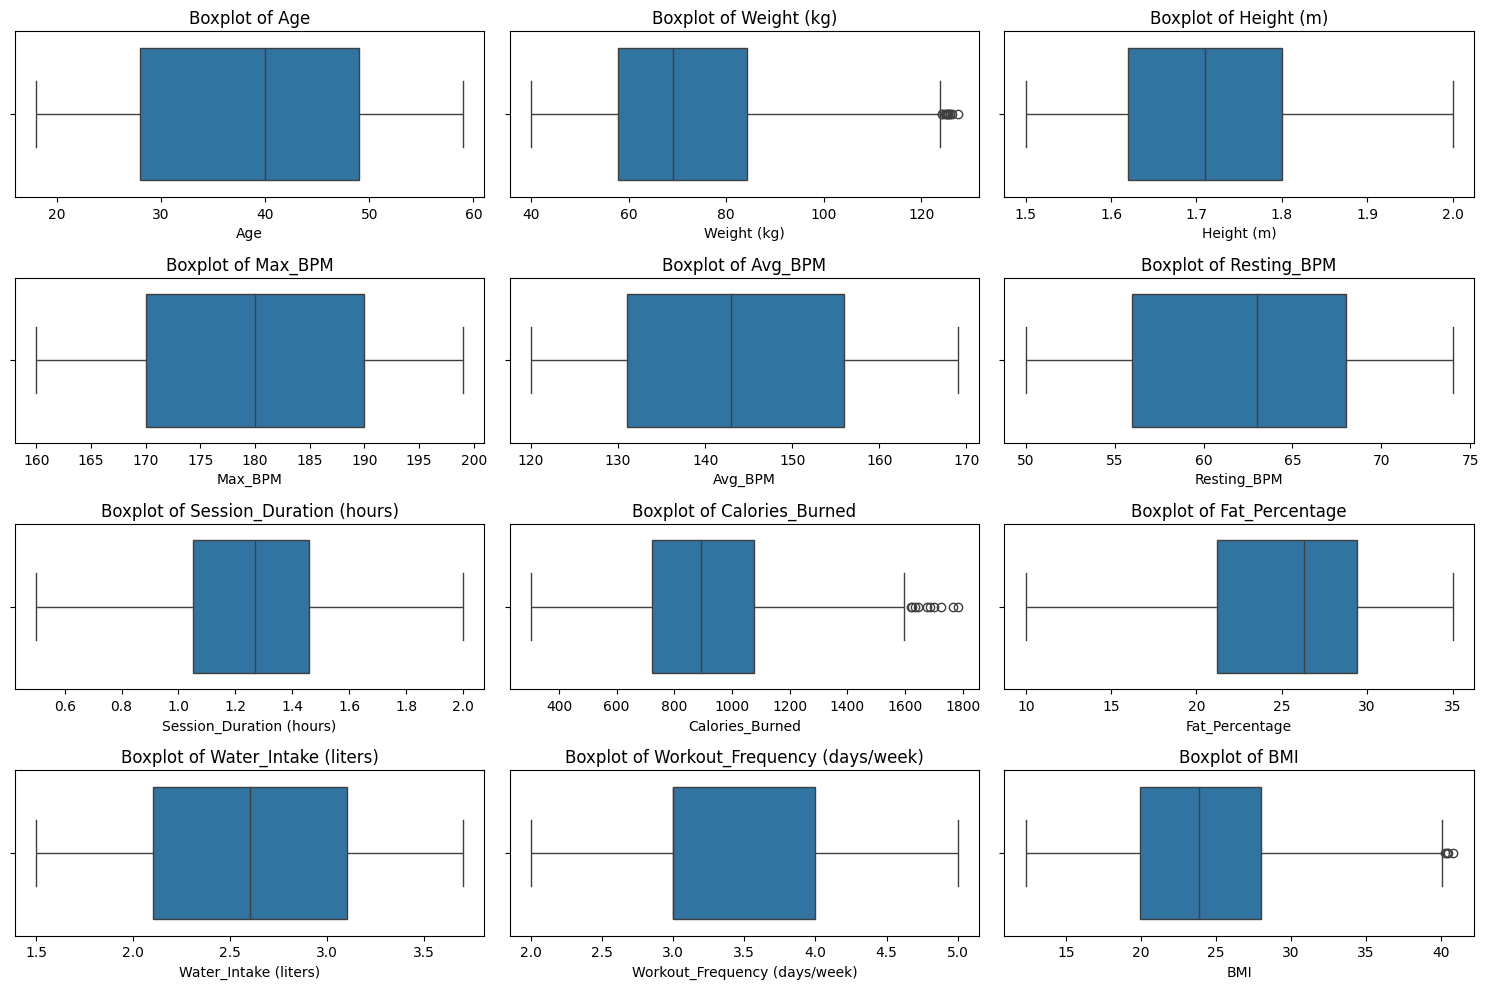

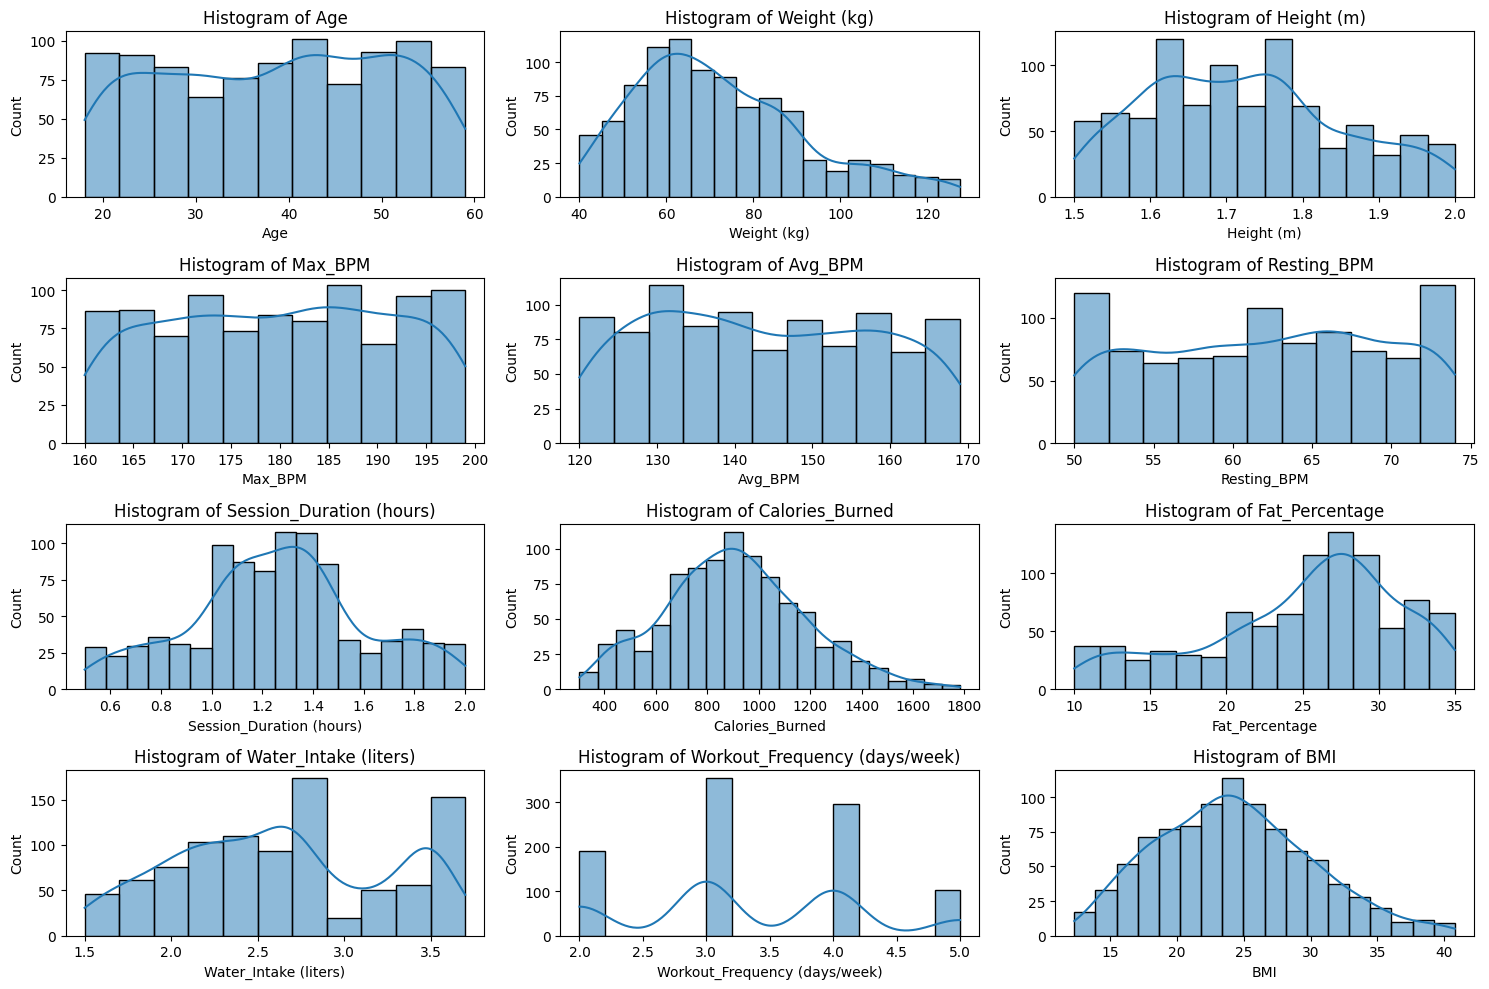

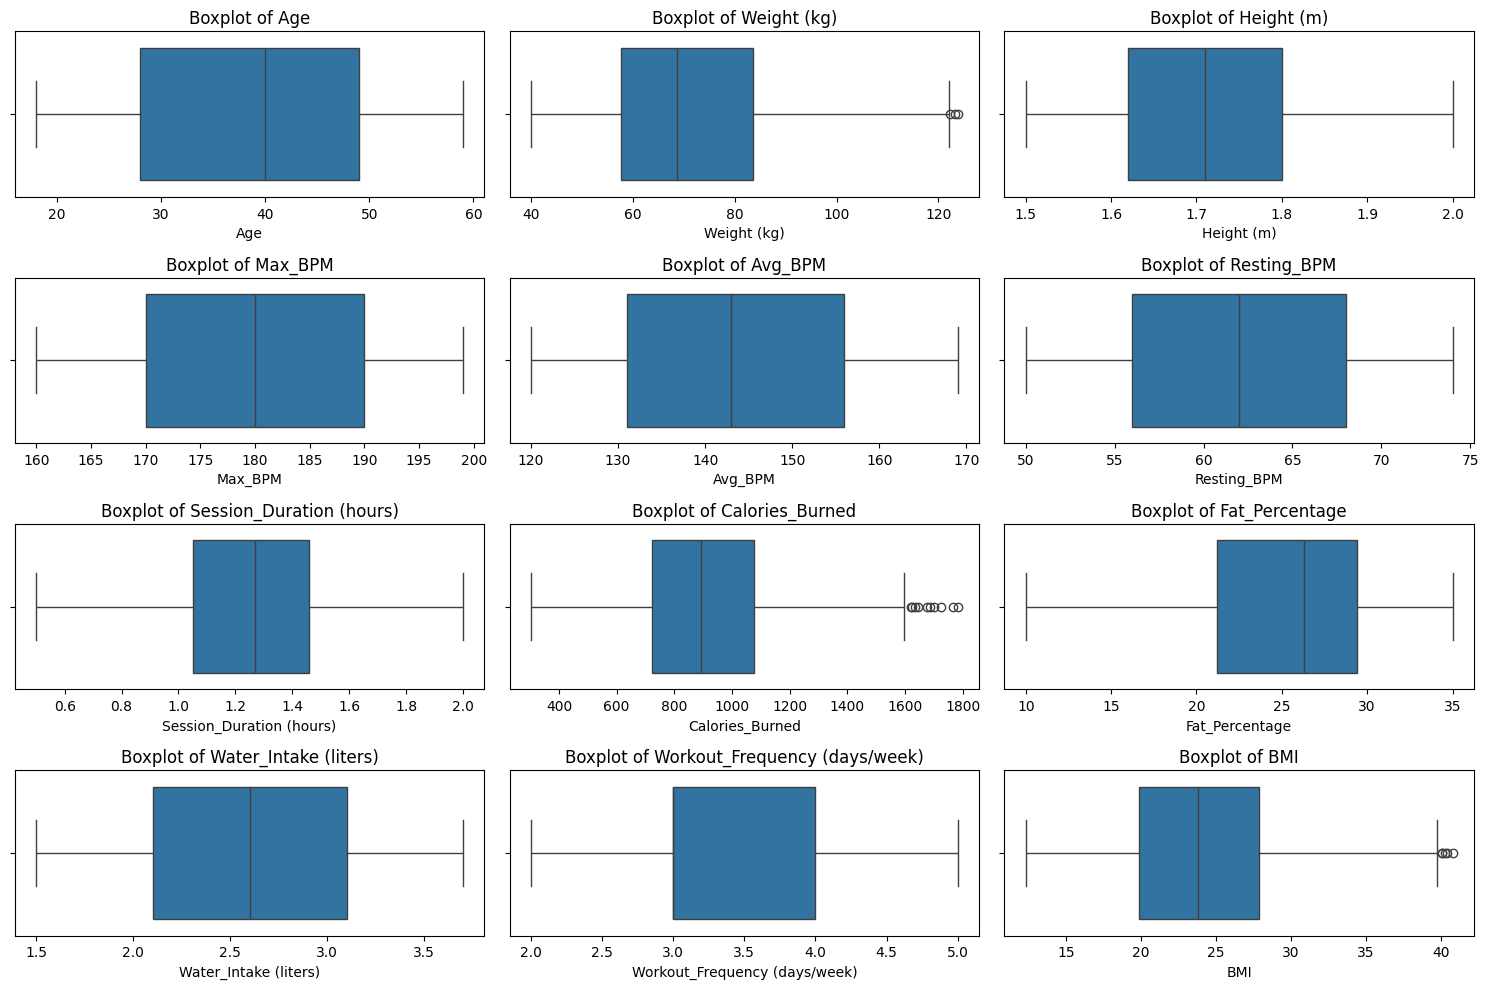

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis quantitativas
quantitative_vars = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                     'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 
                     'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

# Visualização de outliers com boxplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Visualização de outliers com histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Método para lidar com outliers: Remoção de outliers usando o IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar remoção de outliers em todas as variáveis quantitativas
df = remove_outliers(df, 'Weight (kg)')
#df = remove_outliers(df, 'BMI')

# Visualização de outliers após a remoção
plt.figure(figsize=(15, 10))
for i, var in enumerate(quantitative_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()



In [5]:
import numpy as np

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, np.inf], labels=['Adolescent', 'Young Adult', 'Adult', 'Senior'])
df['Hydration_Level'] = pd.cut(df['Water_Intake (liters)'], bins=[0, 1.5, 3, np.inf], labels=['Low', 'Medium', 'High'])
df['Calories_Per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']


C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2321971044.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, ci=None)


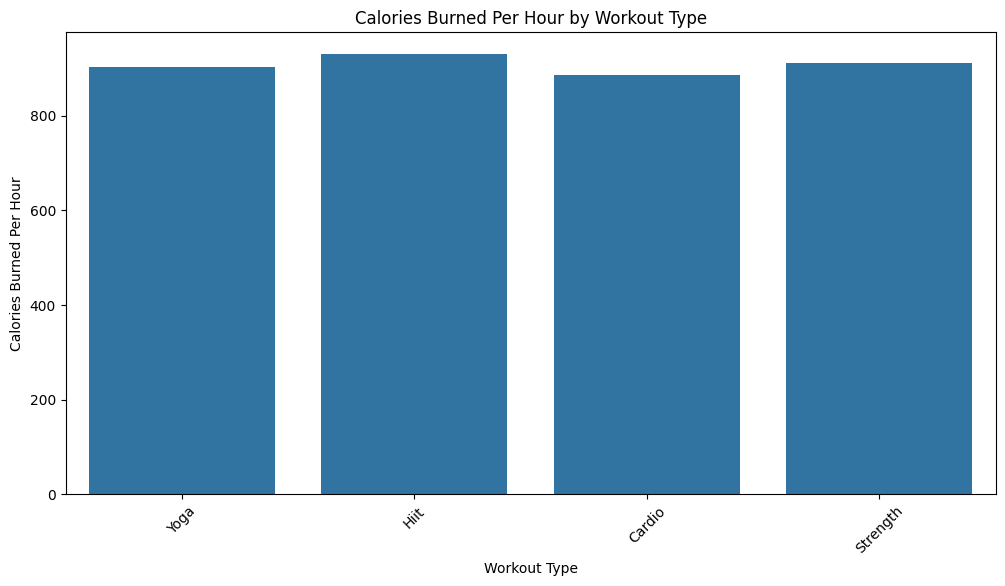

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned Per Hour by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned Per Hour')
plt.xticks(rotation=45)
plt.show()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2141386033.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df, ci=None)


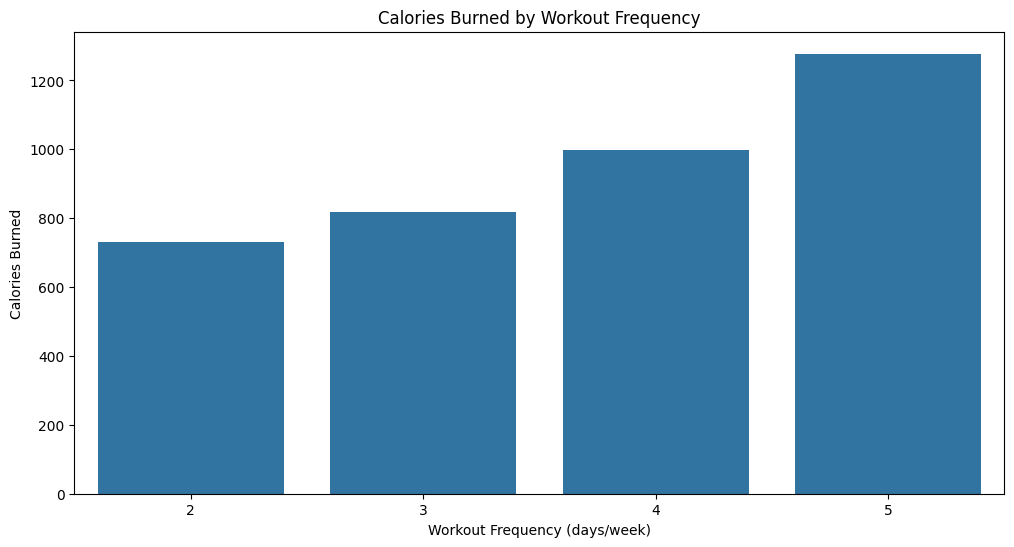

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2141386033.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hydration_Level', y='Calories_Burned', data=df, ci=None)


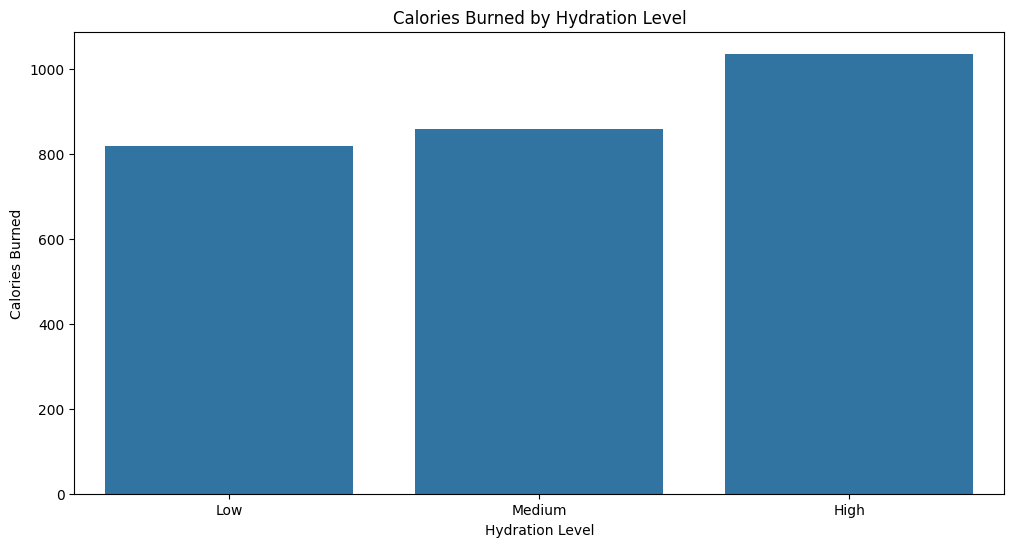

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2141386033.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Experience_Level', y='Calories_Burned', data=df, ci=None)


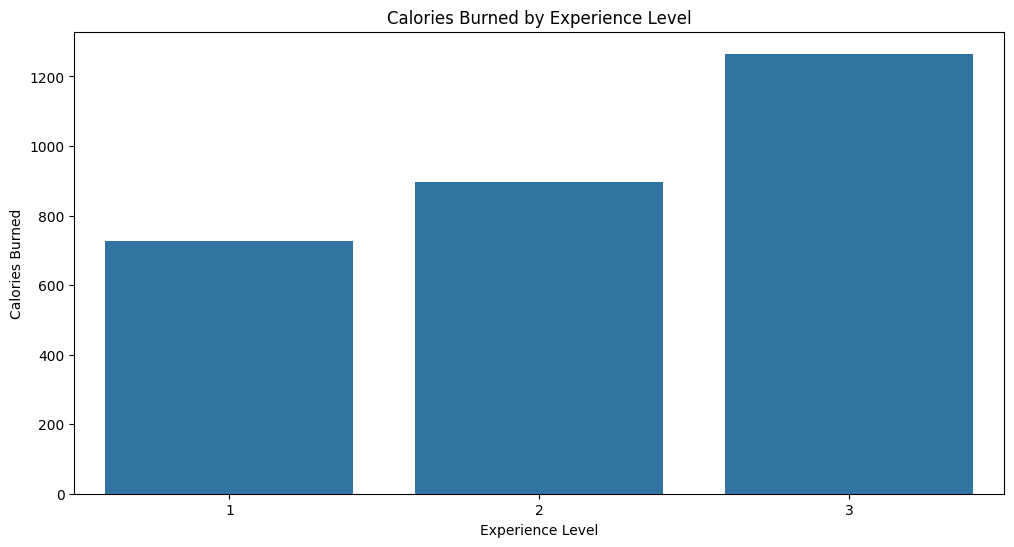

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2141386033.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Calories_Burned', data=df, ci=None)


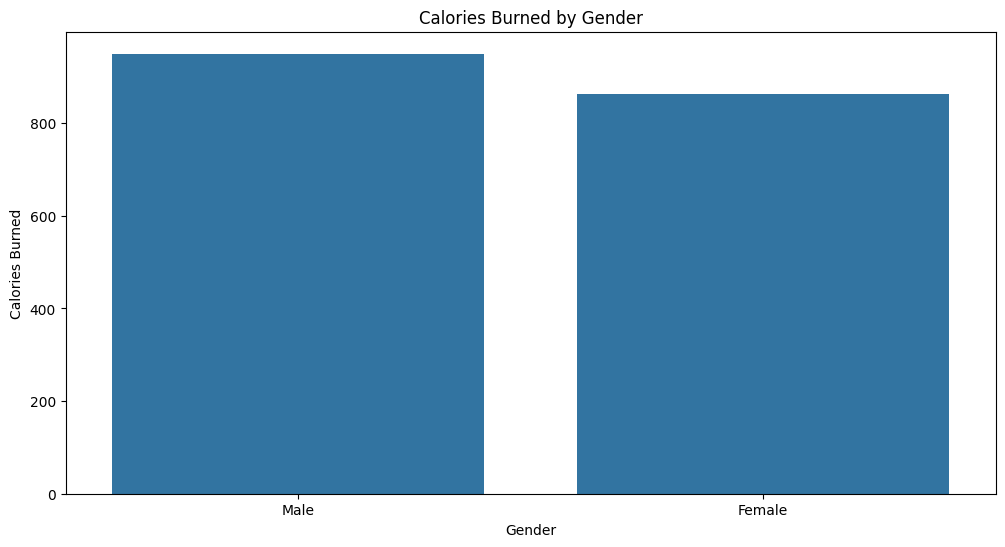

C:\Users\Usuário\AppData\Local\Temp\ipykernel_20308\2141386033.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, ci=None)


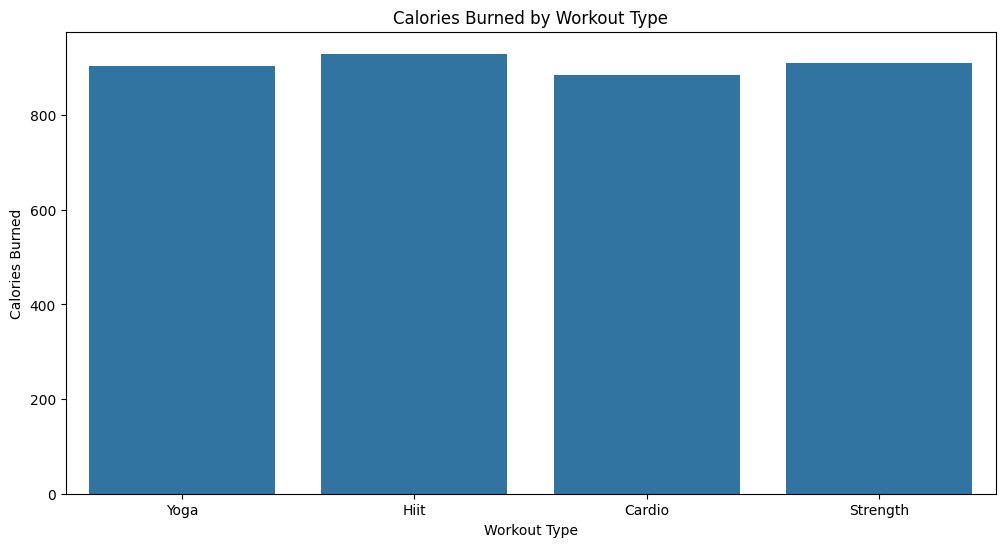

In [7]:
# Gráfico de barras para avaliar a performance (Calories_Burned) de acordo com a quantidade de dias que vai para a academia na semana
plt.figure(figsize=(12, 6))
sns.barplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.show()

# Gráfico de barras para avaliar a performance (Calories_Burned) de acordo com a quantidade de água consumida
plt.figure(figsize=(12, 6))
sns.barplot(x='Hydration_Level', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned by Hydration Level')
plt.xlabel('Hydration Level')
plt.ylabel('Calories Burned')
plt.show()

# Gráfico de barras para avaliar a performance (Calories_Burned) de acordo com o nível de experiência
plt.figure(figsize=(12, 6))
sns.barplot(x='Experience_Level', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.show()

# Gráfico de barras para avaliar a performance (Calories_Burned) de acordo com o sexo
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.show()

# Gráfico de barras para avaliar a performance (Calories_Burned) de acordo com o tipo de treino
plt.figure(figsize=(12, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, ci=None)
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Weight (kg)'),
  Text(0, 2.5, 'Height (m)'),
  Text(0, 3.5, 'Max_BPM'),
  Text(0, 4.5, 'Avg_BPM'),
  Text(0, 5.5, 'Resting_BPM'),
  Text(0, 6.5, 'Session_Duration (hours)'),
  Text(0, 7.5, 'Calories_Burned'),
  Text(0, 8.5, 'Fat_Percentage'),
  Text(0, 9.5, 'Water_Intake (liters)'),
  Text(0, 10.5, 'Workout_Frequency (days/week)'),
  Text(0, 11.5, 'BMI')])

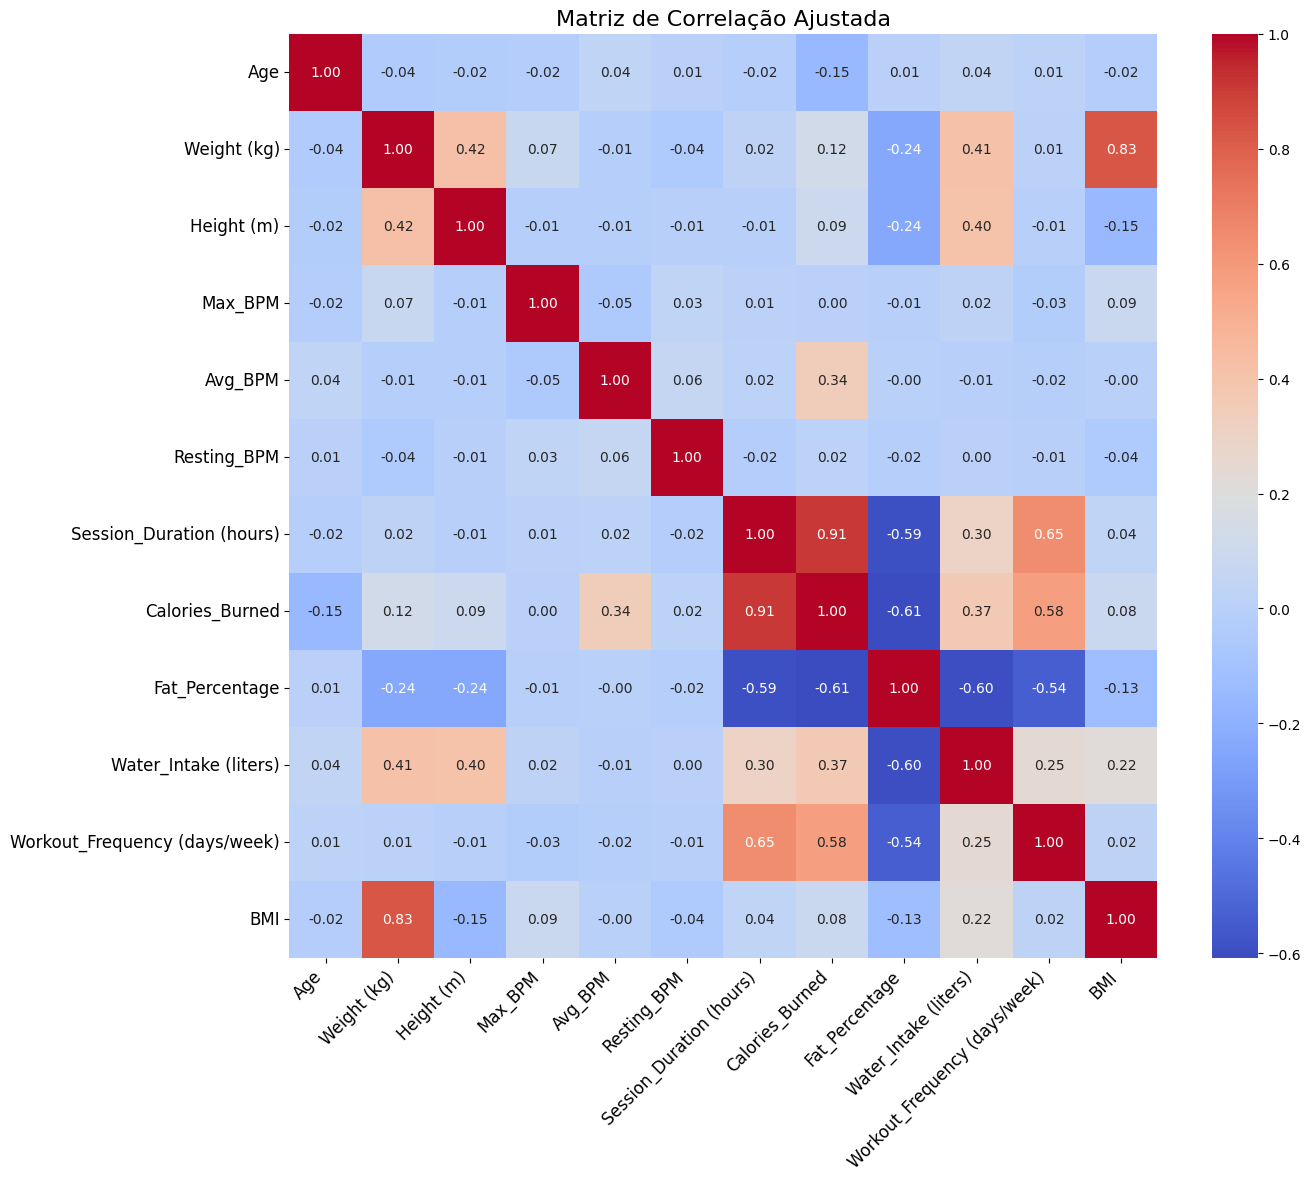

In [8]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as variáveis quantitativas
quantitative_df = df[quantitative_vars]

# Normalizar/padronizar os dados
scaler = StandardScaler()
quantitative_df_scaled = scaler.fit_transform(quantitative_df)

# Calcular a matriz de correlação
correlation_matrix = pd.DataFrame(quantitative_df_scaled, columns=quantitative_vars).corr()


# Ajustar o tamanho da figura
plt.figure(figsize=(14, 12))

# Criar o heatmap com ajustes de anotação e tamanho da fonte
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlação Ajustada', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


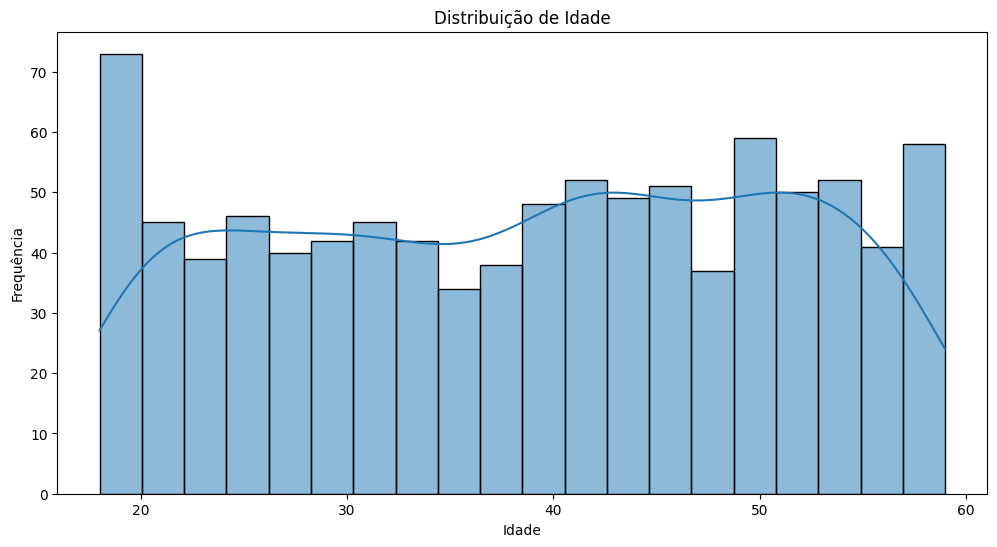

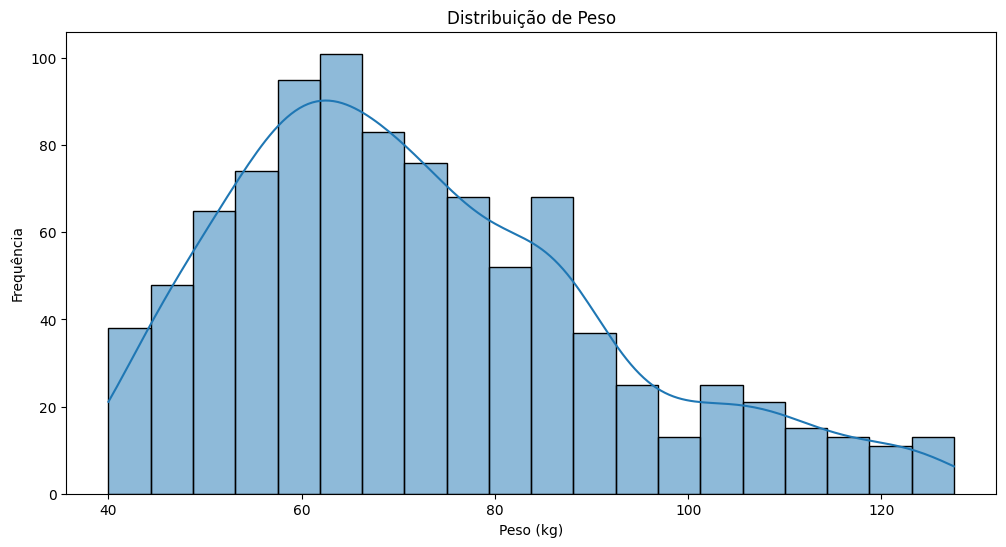

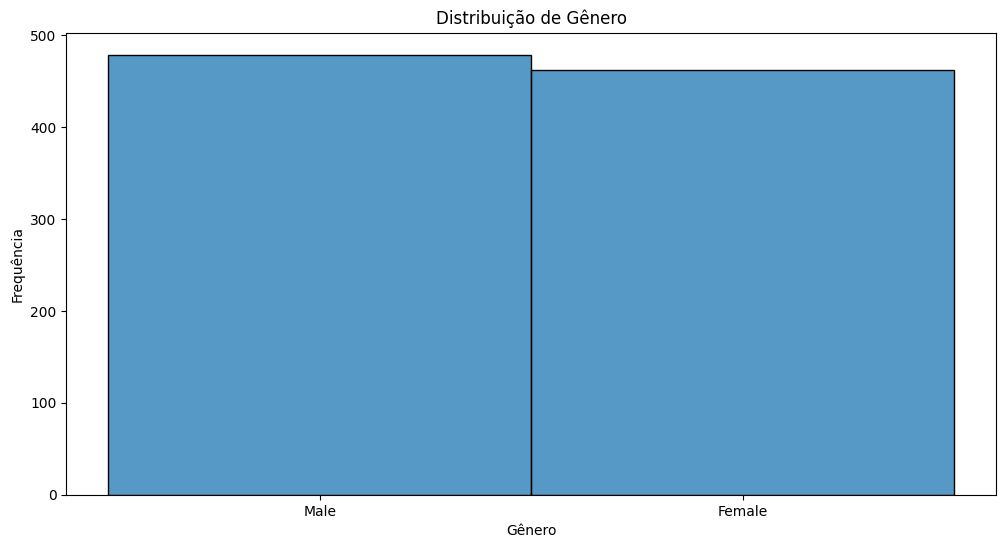

In [9]:
# Histograma para visualizar a distribuição de idade
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Histograma para visualizar a distribuição de peso
plt.figure(figsize=(12, 6))
sns.histplot(df['Weight (kg)'], kde=True, bins=20)
plt.title('Distribuição de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.show()

# Histograma para visualizar a distribuição de gênero
plt.figure(figsize=(12, 6))
sns.histplot(df['Gender'], kde=False, bins=3)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

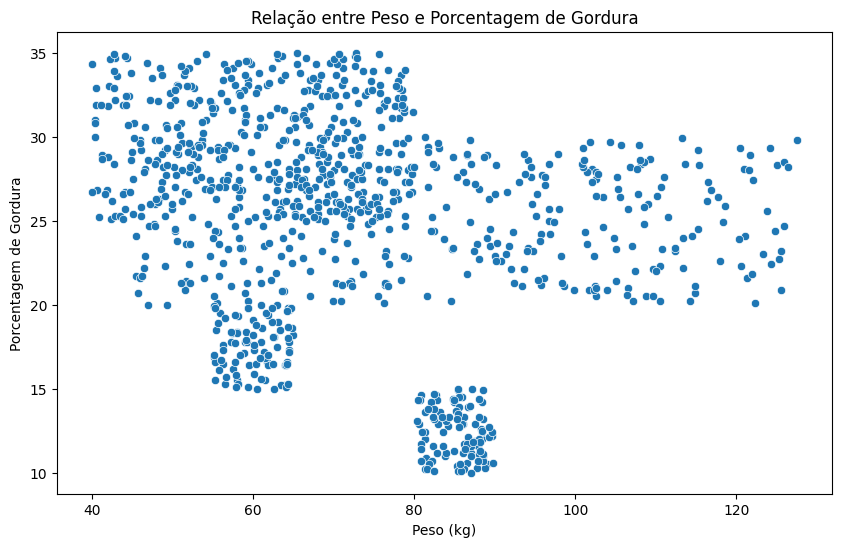

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (kg)', y='Fat_Percentage', data=df)
plt.title('Relação entre Peso e Porcentagem de Gordura')
plt.xlabel('Peso (kg)')
plt.ylabel('Porcentagem de Gordura')
plt.show()

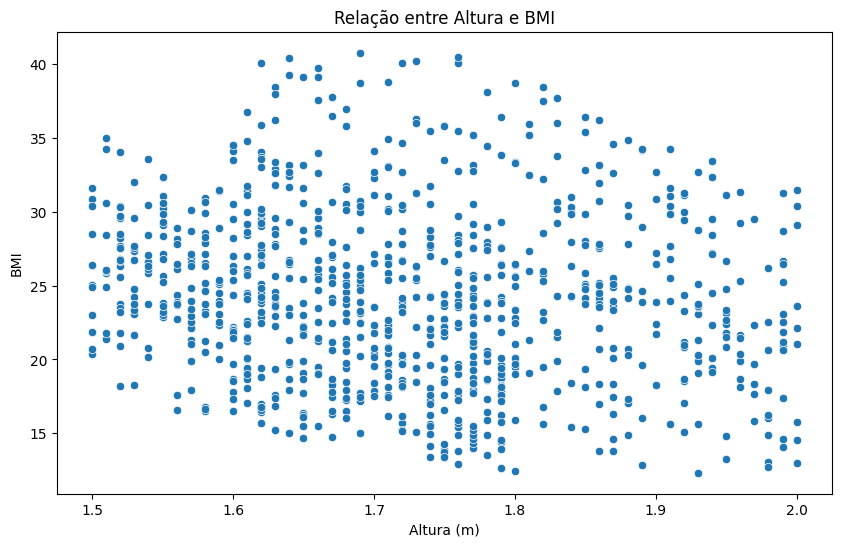

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (m)', y='BMI', data=df)
plt.title('Relação entre Altura e BMI')
plt.xlabel('Altura (m)')
plt.ylabel('BMI')
plt.show()

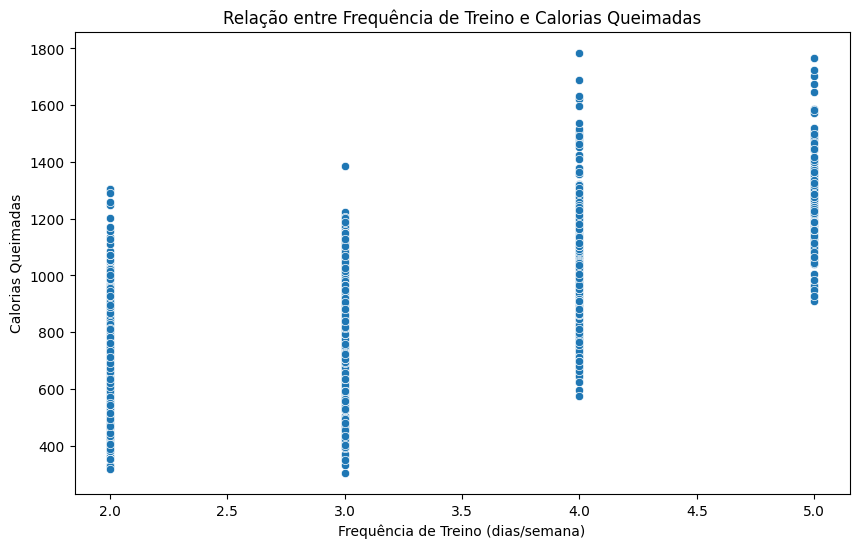

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df)
plt.title('Relação entre Frequência de Treino e Calorias Queimadas')
plt.xlabel('Frequência de Treino (dias/semana)')
plt.ylabel('Calorias Queimadas')
plt.show()

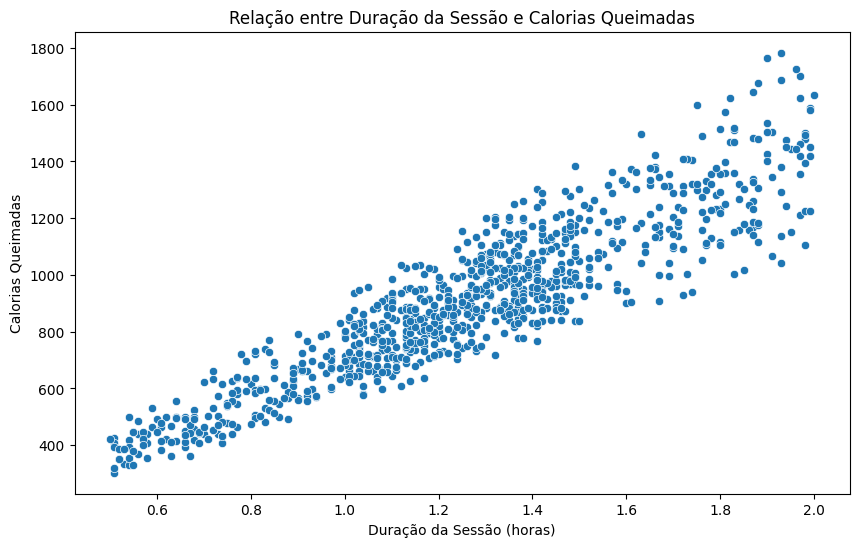

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df)
plt.title('Relação entre Duração da Sessão e Calorias Queimadas')
plt.xlabel('Duração da Sessão (horas)')
plt.ylabel('Calorias Queimadas')
plt.show()

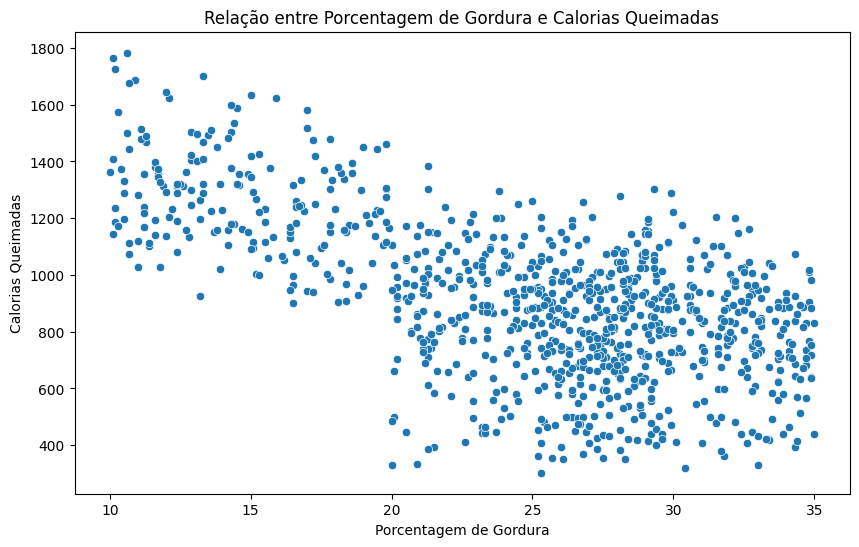

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', data=df)
plt.title('Relação entre Porcentagem de Gordura e Calorias Queimadas')
plt.xlabel('Porcentagem de Gordura')
plt.ylabel('Calorias Queimadas')
plt.show()